In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import gridspec

In [2]:
data=pd.read_html('https://github.com/yashbhutoria/PCE-CS-III-ML-Club/blob/master/README.md')

In [3]:
df2=pd.read_csv('https://docs.google.com/spreadsheets/d/12ctiyShx00Chea0AZ0C9Z1wrKFSunZWUKT6gZmnHdaw/export?format=csv&id=12ctiyShx00Chea0AZ0C9Z1wrKFSunZWUKT6gZmnHdaw&gid=1027535130')

In [4]:
df1=pd.DataFrame(data[0])
df1=df1.append(data[1])

In [5]:
df1.sample(5)

,S.No.,Stars ⭐️,Registration No.,Name,Git Repo Link
14,15,4.0,PCE16CE075,Piyush Vaishya,https://github.com/piyushvaishya/My-ML-Practice
6,7,NaN,PCE16CE036,Disti Jain,https://github.com/distijain98/mymlpractice.git
11,12,NaN,PCE16CE064,Megha Gupta,https://github.com/gmegha12/My-ML-practice
2,3,1.0,PCE16CE023,Ayush Kumar,https://github.com/Ayushkr99/My-Ml-Practice
22,23,NaN,PCE16CE102,Sudhanshu Jain,https://github.com/blacksag/My-ML-Practice.git


In [7]:
df2.loc[df2['Assignment Number'] == 123456 , 'Assignment Number'] = 1

In [8]:
df2.drop(df2[df2.Timestamp == '1/18/2019 1:09:40'].index, inplace=True)

In [9]:
df2.drop(df2[df2.Timestamp == '1/11/2019 14:39:33'].index, inplace=True)

In [10]:
df2['Registration Number']=df2['Registration Number'].str.upper()

In [11]:
df2.sample(5)

,Timestamp,Email Address,Registration Number,Assignment Number
87,1/11/2019 22:27:15,2016pcecesuraj104@poornima.org,PCE16CE104,5
15,06-01-2019 21:55:03,mohitsaini8201@gmail.com,PCE16CE068,1
47,1/8/2019 18:05:52,rathoreprem96@gmail.com,PCE16CE080,3
59,1/9/2019 2:16:54,2016pceceabhishek129@poornima.org,PCE16CE129,2
57,1/9/2019 0:42:10,shivansh.mathur@gmail.com,PCE16CE092,4


In [12]:
df2=df2.groupby('Registration Number')[['Assignment Number']].max()

In [13]:
df=pd.merge(df1,df2,how='inner',left_on='Registration No.',right_on='Registration Number')

In [14]:
df.sample(5)

,S.No.,Stars ⭐️,Registration No.,Name,Git Repo Link,Assignment Number
22,25,5.0,PCE16CE106,Swapnil Singh,https://github.com/swapnil2306/my_ML_practice,6
6,8,1.0,PCE16CE039,Eakta Sharma,https://github.com/ekta-sharma19/MY_ML-Practice,6
16,19,NaN,PCE16CE088,Sakshi Agarwal,https://github.com/Sakshi-Agarwal/My-ML-Practice,6
1,2,6.0,PCE16CE006,Aditya Rajora,https://github.com/Adityarajora/MYMLPractice,6
2,3,1.0,PCE16CE023,Ayush Kumar,https://github.com/Ayushkr99/My-Ml-Practice,6


In [15]:
df=df.drop(columns=['Registration No.','Git Repo Link'])

In [16]:
df.sample(5)

,S.No.,Stars ⭐️,Name,Assignment Number
12,15,4.0,Piyush Vaishya,6
0,1,NaN,Abhishek Sharma,3
8,10,NaN,Jaya Sharma,6
13,16,NaN,Prem Singh Rathore,6
9,11,NaN,Mahima Sukhlecha,5


In [18]:
df= df.sort_values(by=['Assignment Number'], ascending=False)
df.sample(5)

,S.No.,Stars ⭐️,Name,Assignment Number
21,24,3.0,Suraj Kumar,6
2,3,1.0,Ayush Kumar,6
8,10,NaN,Jaya Sharma,6
6,8,1.0,Eakta Sharma,6
11,14,2.0,Mohit Saini,6


In [19]:
stars = df.loc[df['Stars ⭐️'] >= 1.0 ].sort_values('Stars ⭐️').reset_index()
stars.sample(3)

,index,S.No.,Stars ⭐️,Name,Assignment Number
1,6,8,1.0,Eakta Sharma,6
4,17,20,1.0,Sanjoli Jain,2
6,21,24,3.0,Suraj Kumar,6


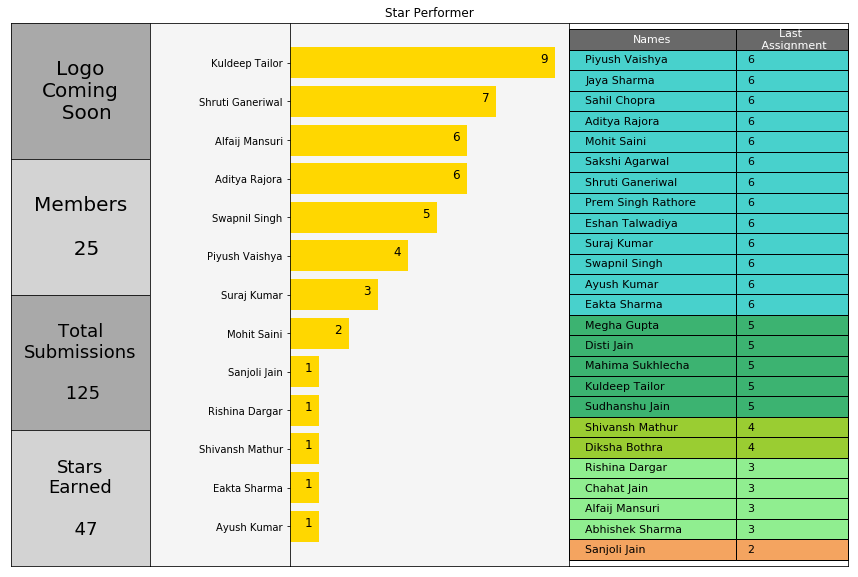

In [21]:
plt.figure(figsize=(15, 10))
gs=gridspec.GridSpec(4,6)
gs.update(wspace=0.0, hspace=0.0)

ax1=plt.subplot(gs[0,0])
ax1.set_facecolor('darkgrey')
plt.xticks(())
plt.yticks(())
plt.text(0.5, 0.5, 'Logo\nComing\n  Soon', ha='center', va='center',fontsize=20, color="black")

ax2=plt.subplot(gs[1,0])
ax2.set_facecolor('lightgrey')
plt.xticks(())
plt.yticks(())
plt.text(0.5, 0.5, "Members\n\n  {}".format(df['Name'].count()), ha='center', va='center',fontsize=20, color="black")

ax3=plt.subplot(gs[2:3:4,0])
ax3.set_facecolor('darkgrey')
plt.xticks(())
plt.yticks(())
plt.text(0.5, 0.5, "Total\nSubmissions\n\n {}".format(df['Assignment Number'].sum()), ha='center', 
         va='center',fontsize=18, color="black")

ax2=plt.subplot(gs[3:,:1])
ax2.set_facecolor('lightgrey')
plt.xticks(())
plt.yticks(())
plt.text(0.5, 0.5, "Stars\nEarned\n\n  {}".format(int(df['Stars ⭐️'].sum())), ha='center', 
         va='center',fontsize=18, color="black")

ax4=plt.subplot(gs[:,1:2])
plt.xticks(())
plt.yticks(())
ax4.set_facecolor('whitesmoke')

ax6=plt.subplot(gs[:,2:4])
ax6.set_facecolor('whitesmoke')
plt.barh(length,stars['Stars ⭐️'],color='gold')
plt.xticks(())
plt.title('Star Performer')
for i in range(len(stars['Name'])):
    plt.text(stars['Stars ⭐️'].values[i]-0.5 ,i,int(stars['Stars ⭐️'][i]), size = 12)

colors =['palevioletred','coral','sandybrown','lightgreen','yellowgreen','mediumseagreen','mediumturquoise']
ax7=plt.subplot(gs[:,4:])
plt.xticks(())
plt.yticks(())
ax7=ax7.table(cellText=df[['Name','Assignment Number']].values,colLabels=['Names','Last \n Assignment'],
              colWidths = [0.6,0.4],cellLoc = 'left',loc='center')
ax7.auto_set_font_size(False)
ax7.set_fontsize(11)
for i in range((df['Name'].count()+1)):
    if i==0:
        ax7[(i,0)].set_text_props(color='w')
        ax7[(i,1)].set_text_props(color='w')
        ax7[(i,0)].set_facecolor(color='dimgray')
        ax7[(i,1)].set_facecolor(color='dimgray')
    else:
        ax7[(i,0)].set_facecolor(color=colors[df['Assignment Number'].values[i-1]])
        ax7[(i,1)].set_facecolor(color=colors[df['Assignment Number'].values[i-1]])
ax7.scale(1,1.7)